In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("kc_house_data.csv")

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
data=data.drop(["id","date"],axis=1)

In [5]:
data.shape

(21597, 19)

In [6]:
y=data.iloc[:,0:1]

In [7]:
y

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0
...,...
21592,360000.0
21593,400000.0
21594,402101.0
21595,400000.0


In [8]:
x=data.drop("price",axis=1)

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)

In [10]:
x_train.shape

(14398, 18)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
k=StandardScaler()
k.fit(x_train)
x_train=k.transform(x_train)
x_test=k.transform(x_test)

In [13]:
k2=StandardScaler()
k2.fit(y_train)
y_train=k2.transform(y_train)
y_test=k2.transform(y_test)

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from tensorflow.keras.utils import to_categorical

In [15]:
def baseline_model():
    model=Sequential()
    model.add(Dense(128,activation="relu",input_dim=18))
    model.add(Dense(64,activation="relu"))
    model.add(Dense(32,activation="relu"))
    model.add(Dense(16,activation="relu"))
    model.add(Dense(8,activation="relu"))
    model.add(Dense(4,activation="relu"))
    model.add(Dense(1))
    opt=Adam(learning_rate=0.001)
    model.compile(loss="mean_squared_error",optimizer=opt)
    return model

In [16]:
model=baseline_model()

In [17]:
history=model.fit(x_train,y_train,verbose=1,batch_size=64,epochs=200,validation_data=(x_test,y_test))

Epoch 1/200
225/225 [==============================] - 4s 8ms/step - loss: 0.2956 - val_loss: 0.1796
Epoch 2/200
225/225 [==============================] - 1s 6ms/step - loss: 0.1753 - val_loss: 0.1369
Epoch 3/200
225/225 [==============================] - 1s 6ms/step - loss: 0.1477 - val_loss: 0.1816
Epoch 4/200
225/225 [==============================] - 1s 6ms/step - loss: 0.1473 - val_loss: 0.1159
Epoch 5/200
225/225 [==============================] - 1s 6ms/step - loss: 0.1291 - val_loss: 0.1098
Epoch 6/200
225/225 [==============================] - 1s 6ms/step - loss: 0.1190 - val_loss: 0.1050
Epoch 7/200
225/225 [==============================] - 1s 6ms/step - loss: 0.1135 - val_loss: 0.1151
Epoch 8/200
225/225 [==============================] - 1s 6ms/step - loss: 0.1109 - val_loss: 0.1103
Epoch 9/200
225/225 [==============================] - 1s 6ms/step - loss: 0.1069 - val_loss: 0.1040
Epoch 10/200
225/225 [==============================] - 1s 6ms/step - loss: 0.0991 - val_lo

225/225 [==============================] - 1s 5ms/step - loss: 0.0360 - val_loss: 0.1086
Epoch 82/200
225/225 [==============================] - 1s 5ms/step - loss: 0.0361 - val_loss: 0.1072
Epoch 83/200
225/225 [==============================] - 1s 5ms/step - loss: 0.0387 - val_loss: 0.1036
Epoch 84/200
225/225 [==============================] - 1s 5ms/step - loss: 0.0348 - val_loss: 0.1137
Epoch 85/200
225/225 [==============================] - 1s 5ms/step - loss: 0.0377 - val_loss: 0.1082
Epoch 86/200
225/225 [==============================] - 1s 5ms/step - loss: 0.0343 - val_loss: 0.1085
Epoch 87/200
225/225 [==============================] - 1s 5ms/step - loss: 0.0342 - val_loss: 0.1063
Epoch 88/200
225/225 [==============================] - 1s 5ms/step - loss: 0.0315 - val_loss: 0.1085
Epoch 89/200
225/225 [==============================] - 1s 5ms/step - loss: 0.0321 - val_loss: 0.1057
Epoch 90/200
225/225 [==============================] - 1s 5ms/step - loss: 0.0330 - val_loss: 

Epoch 161/200
225/225 [==============================] - 1s 5ms/step - loss: 0.0214 - val_loss: 0.1128
Epoch 162/200
225/225 [==============================] - 1s 5ms/step - loss: 0.0211 - val_loss: 0.1158
Epoch 163/200
225/225 [==============================] - 1s 5ms/step - loss: 0.0222 - val_loss: 0.1136
Epoch 164/200
225/225 [==============================] - 1s 5ms/step - loss: 0.0246 - val_loss: 0.1144
Epoch 165/200
225/225 [==============================] - 1s 5ms/step - loss: 0.0242 - val_loss: 0.1162
Epoch 166/200
225/225 [==============================] - 1s 5ms/step - loss: 0.0215 - val_loss: 0.1146
Epoch 167/200
225/225 [==============================] - 1s 5ms/step - loss: 0.0217 - val_loss: 0.1154
Epoch 168/200
225/225 [==============================] - 1s 6ms/step - loss: 0.0220 - val_loss: 0.1137
Epoch 169/200
225/225 [==============================] - 1s 6ms/step - loss: 0.0238 - val_loss: 0.1193
Epoch 170/200
225/225 [==============================] - 1s 5ms/step - lo

In [18]:
from sklearn.metrics import r2_score

In [19]:
yp_train=model.predict(x_train)

In [20]:
r2_score(y_train,yp_train)

0.9770449756274632

In [21]:
yp_test=model.predict(x_test)

In [22]:
r2_score(y_test,yp_test)

0.8627045675422871

In [23]:
# as we can see that it is the overfit model

In [24]:
import matplotlib.pyplot as plt

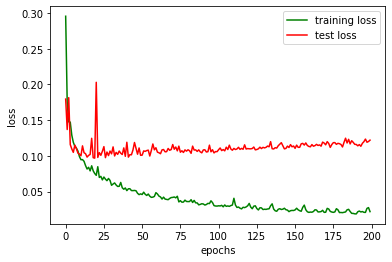

In [25]:
plt.plot(history.history["loss"],color="green",label="training loss")
plt.plot(history.history["val_loss"],color="red",label="test loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

In [26]:
history.history["loss"]

[0.2955720126628876,
 0.17528335750102997,
 0.1476796567440033,
 0.14733746647834778,
 0.1290920227766037,
 0.11903705447912216,
 0.11351443082094193,
 0.11091232299804688,
 0.10691038519144058,
 0.09906475245952606,
 0.0946604385972023,
 0.09484119713306427,
 0.09247803688049316,
 0.08641847223043442,
 0.08164671063423157,
 0.08405279368162155,
 0.07902563363313675,
 0.08615504950284958,
 0.07910971343517303,
 0.0753445252776146,
 0.07281585037708282,
 0.08487206697463989,
 0.06981828063726425,
 0.07137591391801834,
 0.06644143164157867,
 0.07043954730033875,
 0.06750967353582382,
 0.06531976908445358,
 0.06842432916164398,
 0.06569609045982361,
 0.05885111168026924,
 0.06064680591225624,
 0.062160611152648926,
 0.059247344732284546,
 0.057245027273893356,
 0.05744025483727455,
 0.06284809112548828,
 0.05541649088263512,
 0.05334373190999031,
 0.055114056915044785,
 0.05139404907822609,
 0.05397205054759979,
 0.05405530333518982,
 0.051476433873176575,
 0.05139493942260742,
 0.0516573